In [1]:
%reset -f

In [2]:
import numpy                as np
import pygmt
from   kav_init             import *
import matplotlib.pyplot as plt
import os as os
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim


In [ ]:
# --- Plot Solomon Islands overview
plot_solomon    = False
if plot_solomon == True:
    minlon, maxlon, minlat, maxlat = 154, 162, -10.5, -5
    font    = "Helvetica-Bold"
    gridsol = pygmt.datasets.load_earth_relief(
        data_source = "igpp",
        resolution  = "15s",
        region      = [minlon, maxlon, minlat, maxlat],
        use_srtm    = False
        )
    figsol  = pygmt.Figure()
    gridsol = gridsol #- 5.
    figsol.grdimage(
        grid        = gridsol,
        frame       = "a",
        projection  = "M10c",
        cmap        = "geo",
        shading     = True
        )
    figsol.colorbar(
        frame       = ["a1000", "x+lElevation", "y+lm"])
    figsol.grdcontour(
        grid        = gridsol,
        interval    = 1000,
        annotation  = "1000+f6p",
        limit       = "-8000/0",
        pen         = "a0.15p"
        )
    # Plot Kavachi
    figsol.plot(x=[157.979], y=[-8.991],  style='kvolcano/.3c', fill = 'red',  pen='black') # Kavachi
    # figsol.text(x=[157.979], y=[-9.2],    text="Kavachi", font = font)
    # Plot Solomon Islands
    figsol.text(x=[158.680], y=[-8.479],  text="Solomon Islands", angle=335, font=font)
    # Plot Nggatokae Island
    figsol.plot(x=[158.1818], y=[-8.771], style='c.2c', fill='violet', pen='black')
    # save figure
    # figsol.savefig(rootdata+"/results/poster/Solomon_Islands_Overview.png", dpi=600)
    figsol.show()

# --- Plot map of Nggatokae Island with array locations
plot_local      = False
if plot_local   == True:
    import pygmt
    minlon, maxlon, minlat, maxlat = 158.1, 158.25, -8.84, -8.73
    proj            = "M10c"
    stationx        = [158.151, 158.212]
    stationy        = [-8.82,   -8.766]
    stationtxt      = ["Array 1", "Array 2"]
    gridloc         = pygmt.datasets.load_earth_relief(
        data_source = "igpp",
        resolution  = "01s",
        region      = [minlon, maxlon, minlat, maxlat],
        use_srtm    = False
        )
    gridloc         = gridloc - 5.
    figloc          = pygmt.Figure()
    figloc.grdimage(
        grid        = gridloc,
        frame       = "a",
        projection  = proj,
        cmap        = "geo",
        shading     = True
        )
    figloc.colorbar(
        frame       = ["a1000", "x+lElevation", "y+lm"])
    # figloc.coast(
    #     region      = [minlon, maxlon, minlat, maxlat], 
    #     projection  = proj, 
    #     shorelines  = True,
    #     frame       = True
    #     )
    figloc.grdcontour(
        grid        = gridloc,
        levels    = 100,
        annotation  = "100+f6p",
        limit       = "-8000/0",
        pen         = "a0.15p"
        )
    # Plot lines between stations 
    figloc.plot(x=stationx, y=stationy, pen="2p,black")
    figloc.text(x=stationx[0]+(stationx[1]-stationx[0])/2 + 0.01, y=stationy[0]+(stationy[1]-stationy[0])/2, text='~ 8 km', font="Helvetica-Bold")
    # Plot stations
    figloc.plot(x=stationx[0], y=stationy[0], style= 'c.3c', fill= 'blue', pen= 'black')
    figloc.plot(x=stationx[1], y=stationy[1], style= 'c.3c', fill= 'red',  pen= 'black')
    figloc.text(
        x           = stationx[0],
        y           = stationy[0]-.01,
        text        = 'Array 1 w "KAV11"',
        font        = "Helvetica-Bold")
    figloc.text(
        x           = stationx[1],
        y           = stationy[1]-.01,
        text        = 'Array 2 w "KAV04"',
        font        = "Helvetica-Bold")
    # figloc.savefig(rootdata+"/results/poster/Nggatokae_Island.pdf")
    figloc.show()

# --- Plot new regional map
plot_regional   = False
if plot_regional == True:
    minlon, maxlon, minlat, maxlat = 157.9, 158.28, -9.05, -8.7
    proj            = "M10c"
    transpi         = 20
    stationx        = [158.151, 158.212]
    stationy        = [-8.82,   -8.766]
    stationtxt      = ["Array 1", "Array 2"]
    gridreg         = pygmt.datasets.load_earth_relief(
        data_source = "igpp",
        resolution  = "01s",
        region      = [minlon, maxlon, minlat, maxlat],
        use_srtm    = False
        )
    gridreg         = gridreg - 5.
    figreg          = pygmt.Figure()
    figreg.grdimage(
        grid        = gridreg,
        frame       = "a",
        projection  = proj,
        cmap        = "geo",
        shading     = True
        )
    figreg.colorbar( frame       = ["a1000", "x+lElevation", "y+lm"])
    figreg.grdcontour(
        grid        = gridreg,
        levels    = 100,
        annotation  = "100+f6p",
        limit       = "-8000/0",
        pen         = "a0.15p"
        )
    
    # Plot lines between stations 
    figreg.plot(x=stationx, y=stationy, pen="2p,black")
    figreg.text(x=stationx[0]+(stationx[1]-stationx[0])/2 + 0.035, y=stationy[0]+(stationy[1]-stationy[0])/2, text='~ 8 km', font="Helvetica-Bold")
    # Plot stations
    figreg.plot(x=stationx[0], y=stationy[0], style= 'c.3c', fill= 'blue', pen= 'black', transparency=transpi)
    figreg.plot(x=stationx[1], y=stationy[1], style= 'c.3c', fill= 'red',  pen= 'black', transparency=transpi)
    figreg.text(x=stationx[0], y=stationy[0]-.02, text='Array 1,  "KAV11"', font="Helvetica-Bold")
    figreg.text(x=stationx[1], y=stationy[1]+.02, text='Array 2,  "KAV04"', font="Helvetica-Bold")
    # Plot Kavachi
    figreg.plot(x=[157.979], y=[-8.991],  style='kvolcano/.4c', fill = 'red',  pen='black')
    figreg.text(x=[157.979], y=[-8.991+.02],  text="Kavachi", font="Helvetica-Bold")
    # figreg.savefig(rootdata+"/results/poster/Kavachi_region_map_png.png", dpi=600)
    figreg.show()

plot_oceania_nggatokae = False
font = "Helvetica-Bold"
if plot_oceania_nggatokae:
    oceaniacoords   = [145, 165, -17, 0]
    
    gridsol = pygmt.datasets.load_earth_relief(
        data_source = "igpp",
        resolution  = "15s", #'15s'
        region      = oceaniacoords,
        use_srtm    = False
        )
    figsol  = pygmt.Figure()
    gridsol = gridsol #- 5.
    figsol.grdimage(
        grid        = gridsol,
        frame       = "a",
        projection  = "M10c",
        cmap        = "geo",
        shading     = True
        )
    figsol.colorbar(
        frame       = ["a1000", "x+lElevation", "y+lm"])
    figsol.grdcontour(
        grid        = gridsol,
        levels    = 1000,
        annotation  = "1000+f6p",
        limit       = "-8000/0",
        pen         = "a0.15p"
        )
    # # Plot Kavachi
    # figsol.plot(x=[157.979], y=[-8.991],  style='kvolcano/.3c', fill = 'red',  pen='black') # Kavachi
    # # figsol.text(x=[157.979], y=[-9.2],    text="Kavachi", font = font)
    # # Plot Solomon Islands
    figsol.text(x=[158.680], y=[-8.479],  text="Solomon Islands", angle=335, font=font)
    # # Plot Nggatokae Island
    # figsol.plot(x=[158.1818], y=[-8.771], style='c.2c', fill='violet', pen='black')
    # # save figure
    # # figsol.savefig(rootdata+"/results/poster/Solomon_Islands_Overview.png", dpi=600)
    figsol.show()

    regionalcoords  = [157.9, 158.28, -9.05, -8.7]
    gridreg = pygmt.datasets.load_earth_relief(
        data_source = "igpp",
        resolution  = "03s", #'15s'
        region      = oceaniacoords,
        use_srtm    = False
        )
    figreg  = pygmt.Figure()
    gridreg = gridreg #- 5.
    figreg.grdimage(
        grid        = gridreg,
        frame       = "a",
        projection  = "M10c",
        cmap        = "geo",
        shading     = True
        )
    figreg.colorbar(
        frame       = ["a1000", "x+lElevation", "y+lm"])
    figreg.grdcontour(
        grid        = gridreg,
        levels    = 1000,
        annotation  = "1000+f6p",
        limit       = "-8000/0",
        pen         = "a0.15p"
        )
    figreg.show()



# del /p "grdblend_resampled_a19936.nc"

Plotting maps

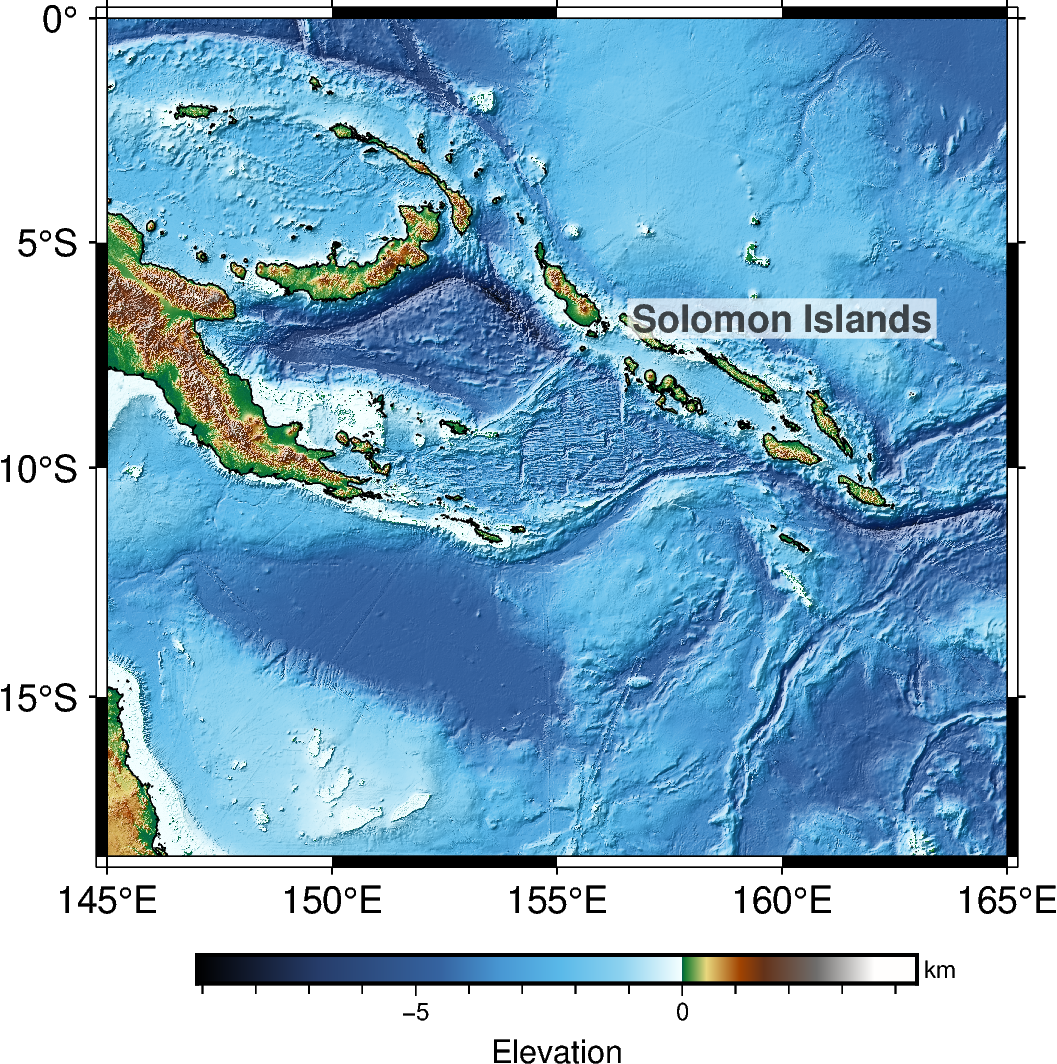

In [4]:
import pygmt
import os as os
# Define region and load topography
oceaniacoords = [145, 165, -18.4211, 0]
grid_oceania = pygmt.datasets.load_earth_relief(
    resolution="15s", region=oceaniacoords, data_source="igpp", use_srtm=False
)

# Create figure
fig = pygmt.Figure()

# Set font size for tick labels
pygmt.config(FONT_ANNOT_PRIMARY="9p")  # tick label size
pygmt.config(FONT_ANNOT_SECONDARY="9p")   # colorbar tick labels

# Plot the shaded relief map
fig.grdimage(
    grid=grid_oceania,
    region=oceaniacoords,
    projection="M3i",  # 3-inch map width
    cmap="geo", #'geo'
    shading=True,
    frame="a"  # auto frame
)
# fig.grdcontour(
        # grid        = grid_oceania,
        # levels      = 2000,
        # annotation  = "100+f6p",
        # # limit       = "-8000/0",
        # pen         = "a0.15p"
        # )

# Add colorbar with elevation label
# fig.colorbar(frame=["a1000", "x+lElevation", "y+lm"])
fig.colorbar(
    frame=["x+lElevation", "y+lkm"],  # label as km
    scale=0.001) #,                     # scale tick values by 1/1000 (m → km)
    # position="JMR+w4c/0.3c+e"        # optional: place and size customization
# )

# Optional: coastlines for context
fig.coast(shorelines="0.25p", resolution="i")

fig.text(x=160, y=-7, text="Solomon Islands", font="9p,Helvetica-Bold,black", justify="CB", fill='white', transparency=30)

# Display the figure
fig.savefig(os.path.join(rootouts, 'thesis','map_left_solomons_2.png'),dpi=300)# bbox_inches='tight')
fig.show()


In [ ]:
pygmt.makecpt(cmap="geo", series="-1800/4000/500", output="custom_geo.cpt")


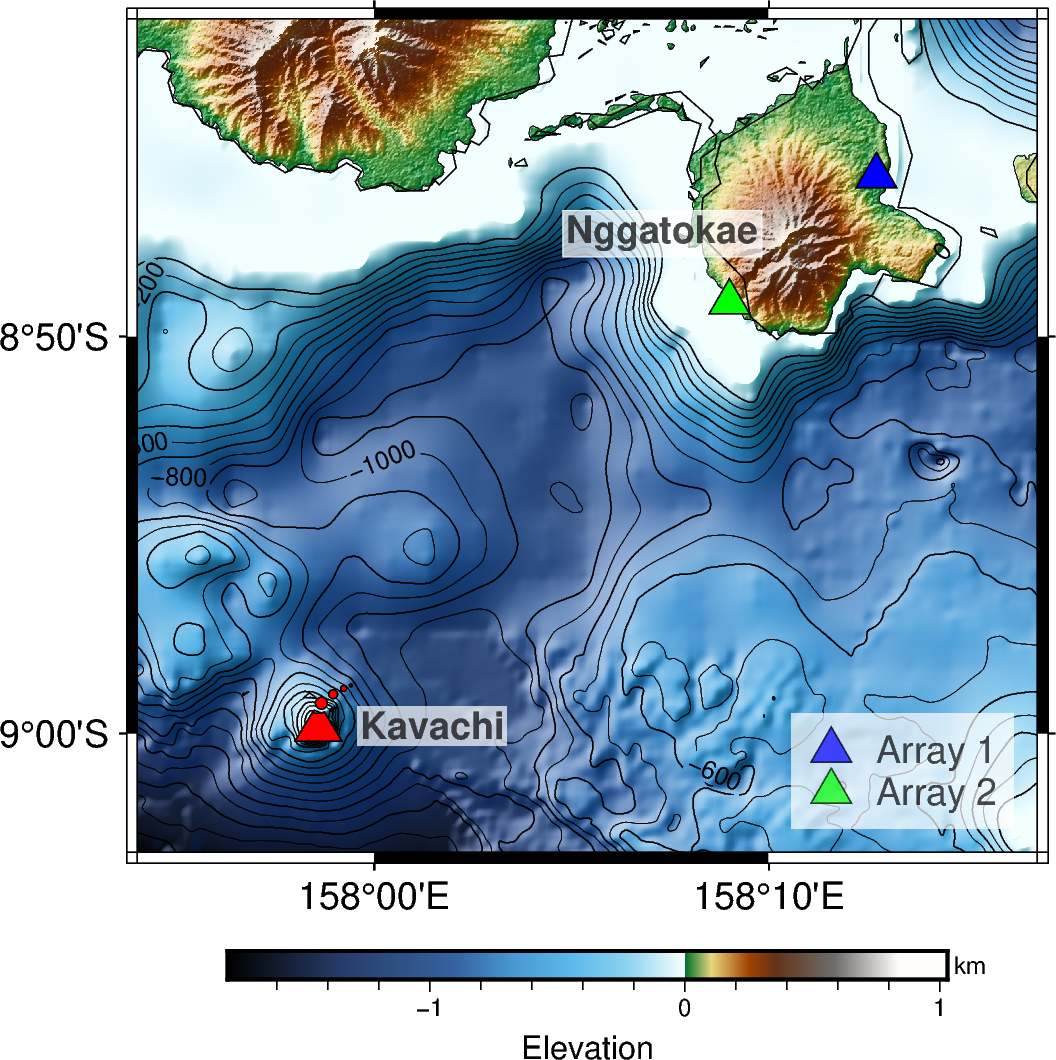

In [12]:
import pygmt

# Define regional map boundaries
regionalcoords = [157.9, 158.28, -9.05, -8.7]

array2_lon, array2_lat = 158.150, -8.819
array1_lon, array1_lat = 158.212, -8.766
# stationx        = [158.151, 158.212]
# stationy        = [-8.82,   -8.766]
# stationtxt      = ["Array 1", "Array 2"]

# Load high-resolution topography
grid_regional = pygmt.datasets.load_earth_relief(
    resolution="01s", region=regionalcoords, data_source="igpp", use_srtm=False
)-1

# Define coordinates for key locations
kavachi_lon, kavachi_lat = 157.979, -8.991
# array1_lon, array1_lat   = 158.150, -8.800   # Example Array 1
# array2_lon, array2_lat   = 158.250, -8.950   # Example Array 2
ngga_lon, ngga_lat       = 158.1818, -8.771  # Nggatokae Island

# Create the figure
fig = pygmt.Figure()

# Set tick label font size
pygmt.config(FONT_ANNOT_PRIMARY="9p")
pygmt.config(FONT_ANNOT_SECONDARY="9p")   # colorbar tick labels

# Plot shaded relief map
# pygmt.makecpt(cmap="geo",continuous=True, series="-2000/4000/500")

fig.grdimage(
    grid=grid_regional,
    region=regionalcoords,
    projection="M3i",  # 3 inches width
    cmap="geo",
    # cmap=True,
    shading=True,
    frame="a",  # auto axis ticks
    # nan_transparent= True
)


fig.grdcontour(
    grid        = grid_regional,
    levels    = 100,
    annotation  = "200+f6p",
    limit       = "-8000/0",
    pen         = "a0.15p"
    )


# Add colorbar
fig.colorbar(frame=['x+lElevation','y+lkm'], scale=0.001)

# Add optional coastline
fig.coast(shorelines="0.25p", resolution="h")

# Plot markers
fig.plot(x=[kavachi_lon], y=[kavachi_lat], style="kvolcano/0.5c", fill="red", pen="black")
fig.plot(x=[array1_lon],  y=[array1_lat],  style="t0.4c", fill="blue", pen="black", label='Array 1')
fig.plot(x=[array2_lon],  y=[array2_lat],  style="t0.4c", fill="green", pen="black", label='Array 2')

# Add labels
fig.text(x=kavachi_lon+0.015, y=kavachi_lat, text="Kavachi", font="9p,Helvetica-Bold,black", justify="LT", fill='white', transparency=30)
fig.text(x=ngga_lon-0.02,    y=array2_lat-(array2_lat-array1_lat)/2.5    + 0.015, text="Nggatokae", font="9p,Helvetica-Bold,black", justify="RT", pen="0.1p,white,solid",fill='white', transparency=30)

fig.legend(
    position="JBR+jBR+o0.2c/0.2c",  # Top-right corner, offset 0.2 cm right and 0.2 cm up
    box="+gwhite",                 # White fill only, no frame (no +p)
    transparency=30,                # 50% transparent legend box
    # font="9p,Helvetica-Bold,black"
)

# Show the figure
fig.savefig(os.path.join(rootouts,'thesis','map_regional_nggatokae_2.png'),dpi=300)
fig.show()


In [30]:
t=158.28-157.9
b = -8.7+9.05
c = t/b
t,b,c 

(0.37999999999999545, 0.3500000000000014, 1.0857142857142683)

In [31]:
b2=(165-145)/c 
b2

18.421052631579244